## GloBox - Converstion Rate A/B testing 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

%matplotlib inline

In [2]:
# importing queried summery data from database

data = pd.read_csv('export (1).csv')

In [3]:
data

,group,total_view,purchased,conv_rate
0,A,24343,955,3.923099
1,B,24600,1139,4.630081


### Design of the experiment

**Research Question** - Does adding the food and drink category as a banner at the top of our website  
increase the conversion rate among website visitors?

**Null Hypothesis** - Adding the food and drink category as a banner at the top of our website **Does not
affect** the conversion rate among website visitors.

**Target Sample Population** - Users purchased products from website from 25-01-2023 to 06-02-2023

**Group A - Control Group** - Users cannot see the banner.<br> 
**Group B- Treatment Group** - USers can see the banner.

### Assumptions:

**Distribution** - z <br> 
**Significance level** - 5% <br> 
**Sample** - Unpooled Proportion

**n1** - Total Number of users in Group A (i.e., Total_view)<br>
**n2** - total Number of users in Group B (i.e., Total_view)<br>
**p1** - Conversion rate of Group A <br>
**p2** - Conversion rate of Group B 


In [4]:
n1 = data.total_view[0]
n2 = data.total_view[1]
p1 = data.conv_rate[0]/100
p2 = data.conv_rate[1]/100

### 95% Confidence Interval of Differences between group

In [5]:
# significance level

alpha = 0.05

# z critical value

z_crit = 1.96

# Unpooled standard Error and Margin of Error 

Se =  np.sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2)

Me = z_crit * Se

####  95% conifidence interval 

In [6]:
# Difference between the two groups
diff = p2 - p1

# CE =  (p2 - p1) +- margin of error of A

lower = diff - Me
Upper = diff + Me


#Confidence interval

CI = [round(lower,4), round(Upper,4)]

### P - value Calculation

In [7]:
# z statistic

z_test = (p2-p1)/Se

# p value for two sided z-test

p_value = round(2*(1-norm.cdf(z_test)),5)

# Check for significance

if p_value < alpha/2:
    print('Statistically Significance')
else:
    print('Not Statistically Significance')

Statistically Significance


In [8]:
print('Null Hypothesis: P2-p1 = 0')
print(f'Base line conversion: p2-p1 = {round(diff,4)}')
print(f'95% Confidence interval for conversion differnce = {CI}')
print("Two tail significance level alpha/2 = 0.0025")
print(f'P - value = {p_value}')

Null Hypothesis: P2-p1 = 0
Base line conversion: p2-p1 = 0.0071
95% Confidence interval for conversion differnce = [0.0035, 0.0107]
Two tail significance level alpha/2 = 0.0025
P - value = 0.00011


**Conclusion:**
    
The calculated confidence interval (CI: 0.0035-0.0107) does not include 0, which suggests that there is a statistically significant difference between the conversion rates of the two groups. <br>

The p-value of 0.00011 is less than the significance level of 0.0025, which also indicates that we can reject the null hypothesis and conclude that there is a statistically significant difference between the two groups.<br>

Therefore, we can conclude that the treatment (Group B) has a statistically significant higher conversion rate than the control (Group A). In other words, we can say that the change made in Group B has a positive impact on the conversion rate.

## Visualization 

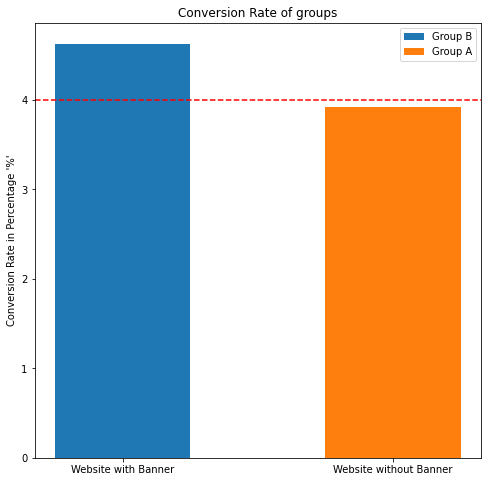

In [9]:
# Set the x-axis labels
labels = ['Website with Banner', 'Website without Banner', 'Difference in Conversion Rate']

# Create a figure
fig, ax = plt.subplots(figsize=(8,8))

# Create bar chart for each group
ax.bar(labels[0], p2 *100 ,label='Group B',width = 0.5)
ax.bar(labels[1], p1*100 ,label='Group A',width = 0.5)
plt.axhline(y=4, color='red', linestyle='--')

# Set the y-axis label
ax.set_ylabel('Conversion Rate in Percentage \'%\'')

# Add title and legend
ax.set_title('Conversion Rate of groups')
ax.legend()


Text(0.5, 1.0, 'A/B test result')

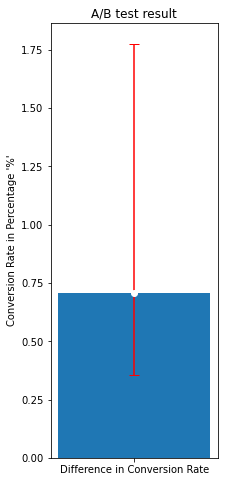

In [10]:
fig, ax = plt.subplots(figsize=(3,8))
ax.bar(labels[2], diff*100 ,label='Difference')
ax.errorbar(labels[2], diff*100, yerr=np.array(CI).reshape(2,1) *100, fmt='wo', ecolor='r', capsize=5)
ax.set_ylabel('Conversion Rate in Percentage \'%\'')
ax.set_title('A/B test result')